## Lendo arquivo formatados em Excel
  - Formatado: todo ele tem m colunas uniformes
  - Nã formatado: tem estruturas de colunas distintas que precisam ser lidas separamente
  
### Um arquivo excel pode ser:
  - xls ou xlsx
  - uma aba, ou multi-abas

### Deu um erro ao tentar ler Excel com Pandas:
  - XLRDError

In [1]:
import os
# se o pandas, abaixo, não consegui ler o arquivo Excel, é por que falta o pacote XLRD
# remova o comentário na frente de os.system(), e corra esta célula

# os.system("conda install -c anaconda xlrd")

In [5]:
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

In [6]:
root_data = '../data/'
# alguém me mando este arquivo
filename = 'Snake Morphotaxonomy.xlsx'

### A maneira correta de juntar path + filename

In [8]:
fullpath = os.path.join(root_data, filename)
print(fullpath)
os.path.exists(fullpath)

../data/Snake Morphotaxonomy.xlsx


True

In [9]:
try:
    df = pd.read_excel(fullpath)
    print("Read '%s'"%fullpath)
except:
    print("Could not read '%s'"%fullpath)

Read '../data/Snake Morphotaxonomy.xlsx'


In [10]:
df.head()

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173
3,B_jararaca,RJ_serra,Female,23,144,31.0,51.0,23.2,173
4,B_jararaca,RJ_serra,Female,25,143,30.0,41.0,24.4,59


In [11]:
df.tail()

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
235,B_new,Colombia,Female,25,145,32.0,53.0,21.5,1173
236,B_new,Colombia,Female,25,146,29.0,42.0,21.5,1173
237,B_new,Colombia,Female,23,146,29.0,43.0,26.0,587
238,B_new,Colombia,Female,23,150,36.0,50.0,22.0,1065
239,B_new,Colombia,Female,23,147,30.0,50.0,21.5,1176


In [12]:
df.columns

Index(['species', 'population', 'sex', 'RDS', 'VS', 'HL', 'TaL', 'temperature',
       'elevation'],
      dtype='object')

###  Columns
  - sex - genero
  - RDS - half body number scales
  - VS  - Ventral scales
  - HL  - head length
  - TaL - tail length
  - temperature - graus Celsius
  - elevation - altitude (m)

### Quantas espécies?

In [13]:
specList = df.species.unique()
len(specList), specList

(3, array(['B_jararaca', 'B_terrificus', 'B_new'], dtype=object))

### Quantas regiões?

In [14]:
popList = df.population.unique()
len(popList), popList

(9,
 array(['RJ_serra', 'RJ_costa', 'Chile_costa', 'Chile_serra',
        'SP_planalto', 'SP_costa', 'Nordeste', 'Centro-oeste', 'Colombia'],
       dtype=object))

### Estatística clássica desctiva

  - média, ssd, count (n), se, median, max, min
  - summary

  - parâmetros:
    - mu = média populacional
    - sigma = standard deviation populacional

    - mean = média amostral
    - ssd = desvio padrão amostral (sample standard error)
    - se ou sem = desvio padrão da média (standard error of the mean)

In [18]:
print(df.columns)
df.head()

Index(['species', 'population', 'sex', 'RDS', 'VS', 'HL', 'TaL', 'temperature',
       'elevation'],
      dtype='object')


,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173
3,B_jararaca,RJ_serra,Female,23,144,31.0,51.0,23.2,173
4,B_jararaca,RJ_serra,Female,25,143,30.0,41.0,24.4,59


### O describe só usa colunas numéricas

In [24]:
df.describe()

,RDS,VS,HL,TaL,temperature,elevation
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,23.925000,147.116667,25.305375,40.146250,24.801250,355.983333
std,1.186835,9.095664,7.451746,13.287027,2.816783,435.795372
min,21.000000,130.000000,11.000000,12.000000,9.100000,0.000000
25%,23.000000,139.000000,19.000000,26.750000,22.900000,50.000000
50%,23.000000,146.000000,26.000000,43.000000,25.600000,80.000000
75%,25.000000,155.000000,31.000000,51.000000,27.000000,761.000000
max,27.000000,166.000000,44.000000,73.000000,30.000000,1432.000000


### Repare que há 240 colunas
  - vamos supor que as 100 primeiras o pesquisador se equivocou e disse que são machos
  - qual a porcentagem de machos e fêmeas
  
sabemos que,

In [27]:
['male']*3

['male', 'male', 'male']

In [28]:
df.sex = ['male']*100 + ['female'] * 140

In [31]:
df.head(3)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,male,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,male,23,145,25.0,43.0,20.3,894
2,B_jararaca,RJ_serra,male,23,144,17.0,18.0,23.2,173


### Qual a porcentagem de machos e de fêmeas?
  - vamos mostrar a maneira mais correta e elegante
  - há várias formas de se fazer este cálculo

In [33]:
pd.factorize(df.sex)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 Index(['male', 'female'], dtype='object'))

In [35]:
df['gender'] = pd.factorize(df.sex)[0]

In [36]:
df.head(3)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation,gender
0,B_jararaca,RJ_serra,male,23,144,25.0,34.0,20.3,894,0
1,B_jararaca,RJ_serra,male,23,145,25.0,43.0,20.3,894,0
2,B_jararaca,RJ_serra,male,23,144,17.0,18.0,23.2,173,0


In [37]:
df.tail(3)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation,gender
237,B_new,Colombia,female,23,146,29.0,43.0,26.0,587,1
238,B_new,Colombia,female,23,150,36.0,50.0,22.0,1065,1
239,B_new,Colombia,female,23,147,30.0,50.0,21.5,1176,1


### E agora? como fica a função describe?

In [38]:
df.describe()

,RDS,VS,HL,TaL,temperature,elevation,gender
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,23.925000,147.116667,25.305375,40.146250,24.801250,355.983333,0.583333
std,1.186835,9.095664,7.451746,13.287027,2.816783,435.795372,0.494037
min,21.000000,130.000000,11.000000,12.000000,9.100000,0.000000,0.000000
25%,23.000000,139.000000,19.000000,26.750000,22.900000,50.000000,0.000000
50%,23.000000,146.000000,26.000000,43.000000,25.600000,80.000000,1.000000
75%,25.000000,155.000000,31.000000,51.000000,27.000000,761.000000,1.000000
max,27.000000,166.000000,44.000000,73.000000,30.000000,1432.000000,1.000000


### Vmaos usar um pouco do seaborn para ver estas estatísticas

In [39]:
import seaborn as sns

In [46]:
df.HL.mean()

25.305375

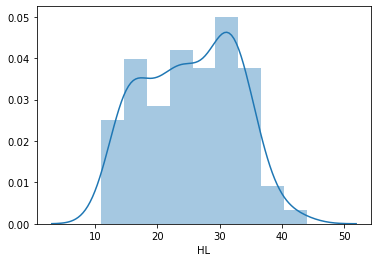

In [53]:
ax = sns.distplot(df["HL"])

### Vamos supor que a cabe dos machos é 80% das fêmeas

In [54]:
df.HL = list(df.HL.iloc[:100] * 0.8) + list(df.HL.iloc[100:])

### Uauuu ! Que tipo de gráfico é este?

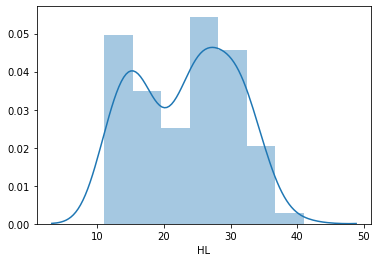

In [55]:
ax = sns.distplot(df["HL"])

### Separando machos e fêmeas

In [56]:
dfm = df[df.gender == 0]
dff = df[df.gender == 1]

dfm.head(2)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation,gender
0,B_jararaca,RJ_serra,male,23,144,20.0,34.0,20.3,894,0
1,B_jararaca,RJ_serra,male,23,145,20.0,43.0,20.3,894,0


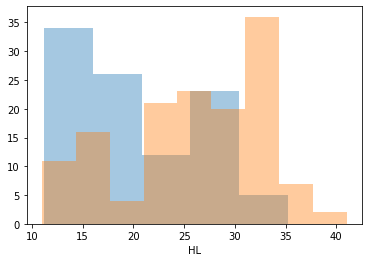

In [65]:
fig, ax = plt.subplots()
for i in range(2):
    if i == 0:
        data = dfm.HL
        label = 'males'
        color = 'blue'
    if i == 1:
        data = dff.HL
        label = 'females'
        color = 'red'
        
    g = sns.distplot(data,ax=ax, kde=False)
 

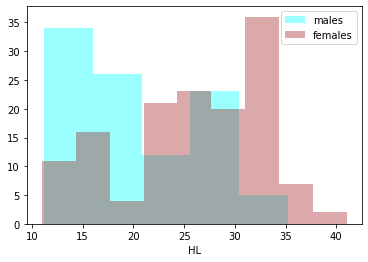

In [67]:
fig, ax = plt.subplots()
for i in range(2):
    if i == 0:
        data = dfm.HL
        label = 'males'
        color = 'cyan'
    if i == 1:
        data = dff.HL
        label = 'females'
        color = 'brown'
        
    g = sns.distplot(data,ax=ax, kde=False, label=label, color=color)
    
ax.legend();  

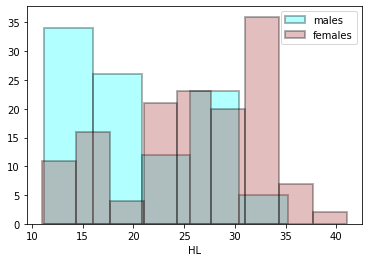

In [68]:
fig, ax = plt.subplots()
for i in range(2):
    if i == 0:
        data = dfm.HL
        label = 'males'
        color = 'cyan'
    if i == 1:
        data = dff.HL
        label = 'females'
        color = 'brown'
        
    g = sns.distplot(data,ax=ax, kde=False, label=label, 
                     hist_kws = {'color':color, 'edgecolor':'black', 'linewidth':2, 'linestyle':'-', 'alpha':0.3})
    
ax.legend();  

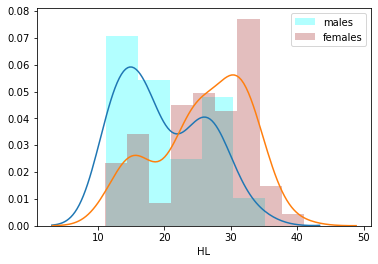

In [70]:
fig, ax = plt.subplots()
for i in range(2):
    if i == 0:
        data = dfm.HL
        label = 'males'
        color = 'cyan'
    if i == 1:
        data = dff.HL
        label = 'females'
        color = 'brown'
        
    g = sns.distplot(data,ax=ax, kde=True, label=label, 
                     hist_kws = {'color':color, 'alpha':0.3})
    
ax.legend();

### O que você conclui?
### Qual a proposta de trabalho?

In [ ]:
sns.set_palette

### Boxplot x mediana + quartis

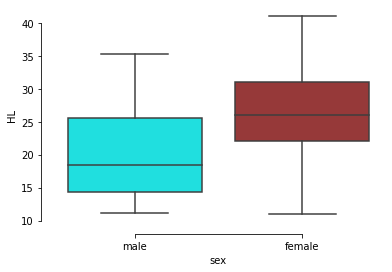

In [80]:
sns.boxplot(  x="sex", y="HL", palette=["cyan", "brown"], data=df) # alpha=0.3
sns.despine(offset=10, trim=True)

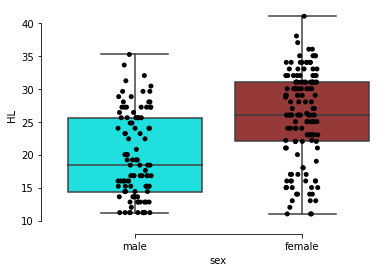

In [81]:
sns.boxplot(  x="sex", y="HL", palette=["cyan", "brown"], data=df) # alpha=0.3
sns.stripplot(x="sex", y="HL", color='black', data=df)
sns.despine(offset=10, trim=True)

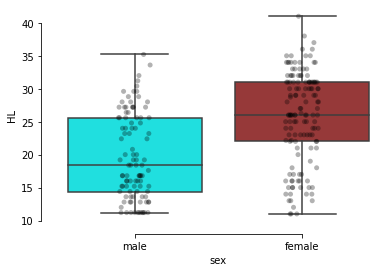

In [82]:
sns.boxplot(  x="sex", y="HL", palette=["cyan", "brown"], data=df) # alpha=0.3
sns.stripplot(x="sex", y="HL", color='black',alpha=0.3,   data=df)
sns.despine(offset=10, trim=True)

### Uma das propostas é 'quebrar' os dados por espécie ou população

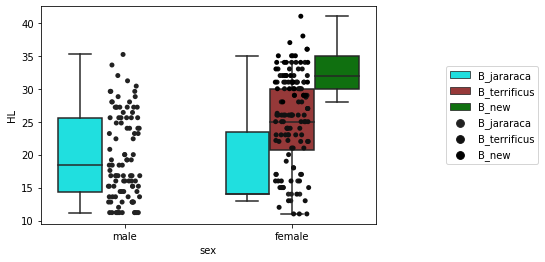

In [95]:
ax = sns.boxplot( x="sex", y="HL", hue="species", palette=["cyan", "brown", "green"], data=df) # alpha=0.3
ax = sns.stripplot( x="sex", y="HL", hue="species", color='black', data=df)

# sns.despine(offset=10, trim=True)

ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5));

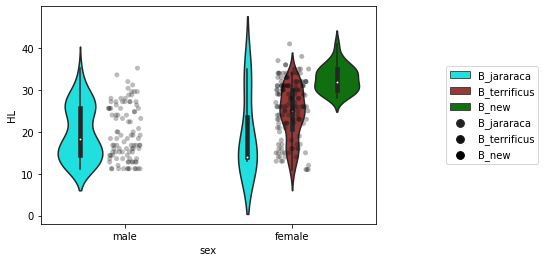

In [97]:
ax = sns.violinplot( x="sex", y="HL", hue="species", palette=["cyan", "brown", "green"], data=df) # alpha=0.3
ax = sns.stripplot( x="sex", y="HL", hue="species", color='black', data=df, alpha=.3)

# sns.despine(offset=10, trim=True)

ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5));

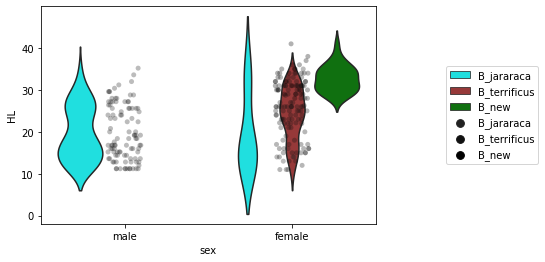

In [98]:
ax = sns.violinplot( x="sex", y="HL", hue="species", palette=["cyan", "brown", "green"], inner=None, data=df) # alpha=0.3
ax = sns.stripplot( x="sex", y="HL", hue="species", color='black', data=df, alpha=.3)

# sns.despine(offset=10, trim=True)

ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5));

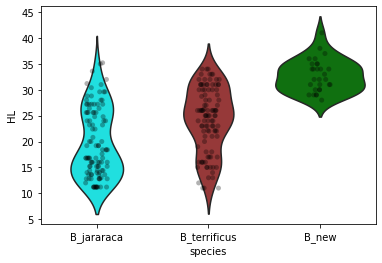

In [101]:
ax = sns.violinplot( x="species", y="HL", palette=["cyan", "brown", "green"], inner=None, data=df) # alpha=0.3
ax = sns.stripplot( x="species", y="HL",  color='black', data=df, alpha=.3)

# sns.despine(offset=10, trim=True)

# ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5));

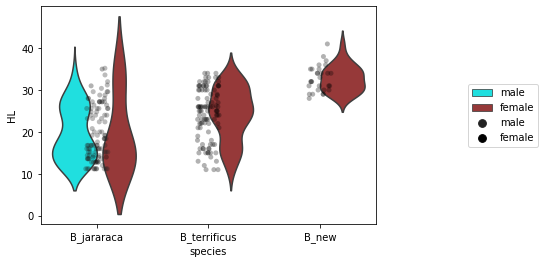

In [103]:
ax = sns.violinplot( x="species", y="HL", hue='sex', palette=["cyan", "brown"], inner=None, data=df) # alpha=0.3
ax = sns.stripplot( x="species", y="HL",  hue='sex', color='black', data=df, alpha=.3)

# sns.despine(offset=10, trim=True)

ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5));

### Exercite com dados do seaborn

In [47]:
penguins = sns.load_dataset("penguins")
type(penguins)

pandas.core.frame.DataFrame

In [48]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [49]:
penguins.shape

(344, 7)

### Histograma

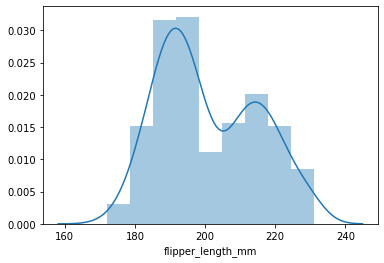

In [52]:
ax = sns.distplot(penguins["flipper_length_mm"])